In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [24]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [25]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')],
)

testing = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2639 - accuracy: 0.9208 - val_loss: 0.1337 - val_accuracy: 0.9595
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9665 - val_loss: 0.1154 - val_accuracy: 0.9662
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9779 - val_loss: 0.1021 - val_accuracy: 0.9710
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0974 - val_accuracy: 0.9741
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.1019 - val_accuracy: 0.9725
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0978 - val_accuracy: 0.9738
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0999 - val_accuracy: 0.9749
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

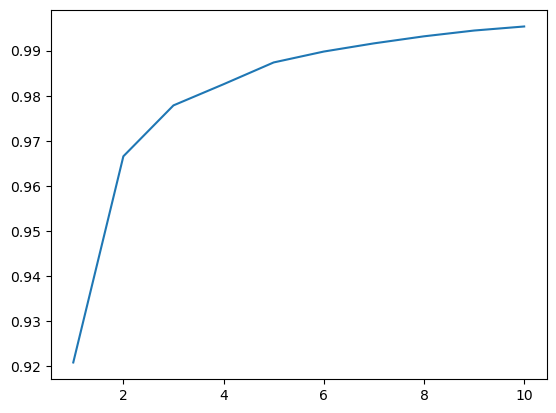

In [27]:

plt.plot(
    np.arange(1, 11), 
    testing.history['accuracy'], label='Accuracy'
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

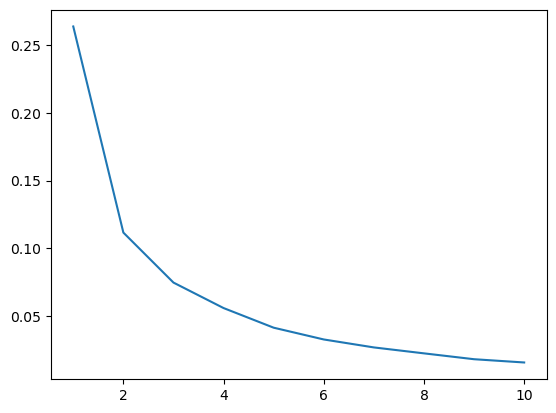

In [28]:
plt.plot(
    np.arange(1, 11), 
    testing.history['loss'], label='Loss'
)
plt.show

In [29]:
model.evaluate(ds_test)


79/79 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9759


[0.10695288330316544, 0.9758999943733215]